#**Cluster analysis or clustering**

**Hard Clustering:**
* Affinity Propagation
* Agglomerative Clustering
* BIRCH
* DBSCAN
* K-Means
* Mini-Batch K-Means
* Mean Shift
* OPTICS
* Spectral Clustering
* Mixture of Gaussians

**Soft Clustering:**
* Fuzzy Clustering



In [ ]:
import pandas as pd

path_file = '/content/drive/MyDrive/Colab Notebooks/Clustering/Dataset_PCLQ.xlsx'
df_data = pd.read_excel(path_file, index_col=0)   

df_data = df_data.rename(columns={'Restiction': 'Restriction'})
df_data.head()

,Gender,Report,Age,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Suffocation,Restriction
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PCLQ-1,Female,Non-Phobia,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
PCLQ-2,Female,Non-Phobia,30,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,1,4,10
PCLQ-3,Female,Unknown,35,1,0,0,0,1,1,0,0,0,0,1,2,1,0,3,0,1,1,1,2,1,1,2,2,1,0,7,15
PCLQ-4,Male,Unknown,28,1,0,0,1,1,1,1,0,2,1,2,2,0,1,2,1,2,3,1,1,2,0,1,1,2,1,13,17
PCLQ-5,Female,Non-Phobia,30,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,4,4,1,1,1,0,1,4,2,0,2,18


In [ ]:
df_data.shape

(355, 31)

In [ ]:
# splitting dataframe by groups 
# grouping by particular dataframe column 
Gendered = df_data.groupby(df_data.Report) 
df_NPhobia = Gendered.get_group("Non-Phobia")
df_Phobia = Gendered.get_group("Phobia")
df_data_train = Gendered.get_group("Unknown")

**Visualization CLQ Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

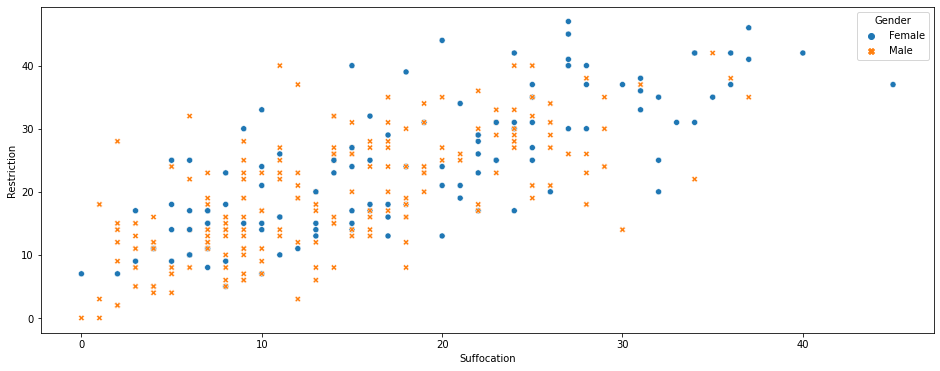

In [ ]:
df_data = df_data_train
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df_data, x="Suffocation", y="Restriction", hue="Gender", style="Gender")

<Figure size 1152x432 with 0 Axes>

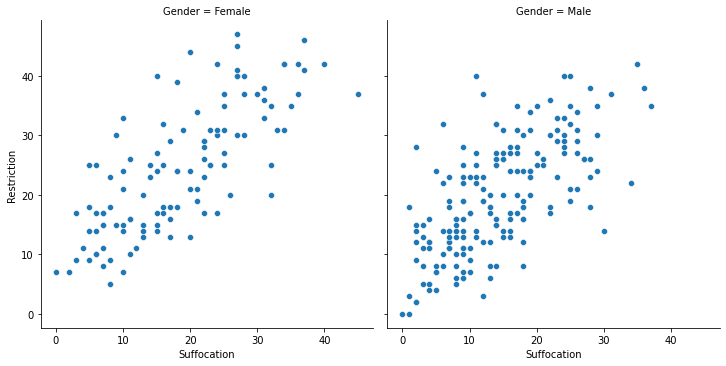

In [ ]:
plt.figure(figsize=(16, 6))
sns.relplot(data=df_data, x="Suffocation", y="Restriction", col="Gender", kind="scatter")

In [ ]:

# splitting dataframe by groups 
# grouping by particular dataframe column 
Gendered = df_data.groupby(df_data.Gender) 
df_Female = Gendered.get_group("Female").iloc[:,29:31] 
df_Male = Gendered.get_group("Male").iloc[:,29:31]
df_Female.head()

,Suffocation,Restriction
ID,,
PCLQ-3,7,15
PCLQ-12,8,18
PCLQ-14,17,13
PCLQ-36,5,9
PCLQ-38,20,21


# **Fuzzy Clustering**

In [ ]:
!pip install scikit-fuzzy

In [ ]:
female_data = df_Female[['Suffocation', 'Restriction']].to_numpy()
female_data = female_data.T

male_data = df_Male[['Suffocation', 'Restriction']].to_numpy()
male_data = male_data.T

**Female Data Clustering**

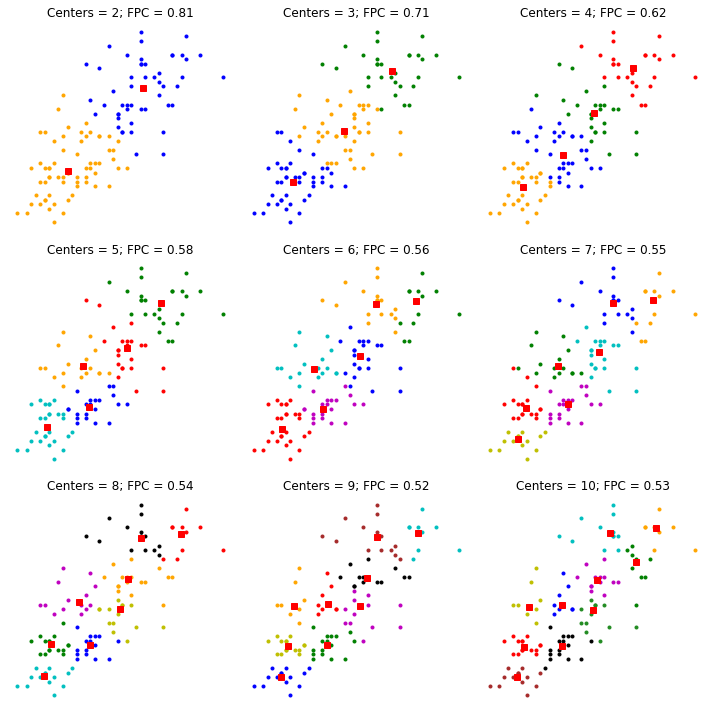

In [ ]:
import numpy as np
import skfuzzy as fuzz

# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(10, 10))
xpts = female_data[0,:]
ypts = female_data[1,:]
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc), size=12)
    ax.axis('off')

fig1.tight_layout()

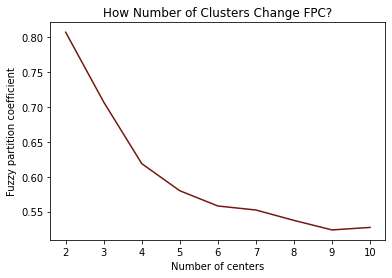

In [ ]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs, color='#731810')
ax2.set_title("How Number of Clusters Change FPC?")
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")
plt.show()

**Male Data Clustering**

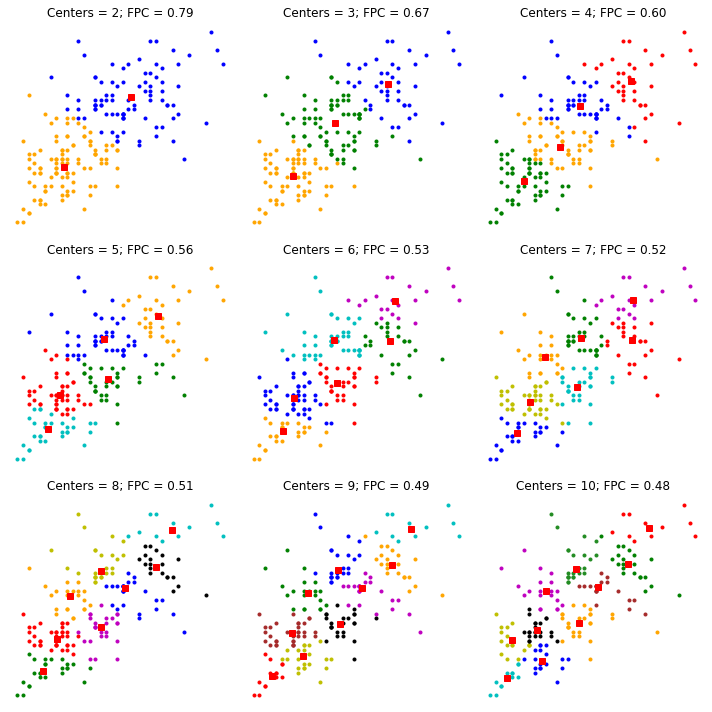

In [ ]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(10, 10))
xpts = male_data[0,:]
ypts = male_data[1,:]

alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc), size=12)
    ax.axis('off')

fig1.tight_layout()

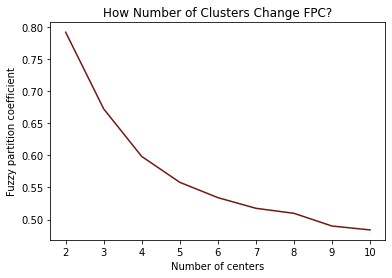

In [ ]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs, color='#731810')
ax2.set_title("How Number of Clusters Change FPC?")
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")
plt.show()

**Clustering for 2 Cluster Cluastrophobia and Non-Cluastrophobia**

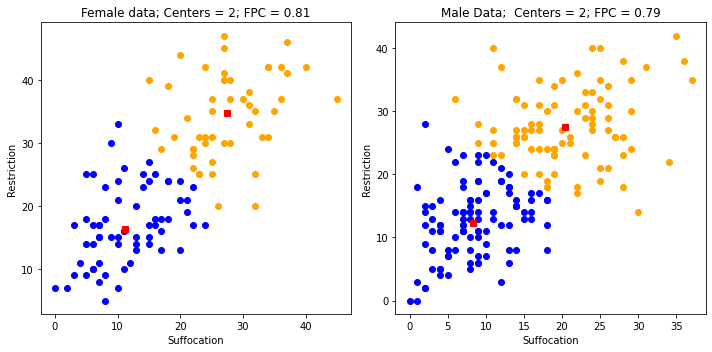

In [ ]:
import numpy as np
import skfuzzy as fuzz

# Set up the loop and plot
fig1, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
xpts = female_data[0,:]
ypts = female_data[1,:]
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
alldata_Female = np.vstack((xpts, ypts))
fpcs = []

ncenters=2
cntr_F, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
      alldata_Female, ncenters, 2, error=0.005, maxiter=1000, init=None)

# Store fpc values for later
fpcs.append(fpc)

# Plot assigned clusters, for each data point in training set
cluster_membership = np.argmax(u, axis=0)
cluster_membership_F = cluster_membership

for j in range(ncenters):
      ax1.plot(xpts[cluster_membership == j],
              ypts[cluster_membership == j], '.', color=colors[j],linewidth=2, markersize=12)

# Mark the center of each fuzzy cluster
for pt in cntr_F:
      ax1.plot(pt[0], pt[1], 'rs')

ax1.set_title('Female data; Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc), size=12)
#ax1.axis('off')
#--------------------------------------------------------------------------------------------------------------
xpts = male_data[0,:]
ypts = male_data[1,:]
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
alldata_male = np.vstack((xpts, ypts))
fpcs = []

ncenters=2
cntr_M, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
      alldata_male, ncenters, 2, error=0.005, maxiter=1000, init=None)

# Store fpc values for later
fpcs.append(fpc)

# Plot assigned clusters, for each data point in training set
cluster_membership = np.argmax(u, axis=0)
cluster_membership_M = cluster_membership
for j in range(ncenters):
      ax2.plot(xpts[cluster_membership == j],
              ypts[cluster_membership == j], '.', color=colors[j],linewidth=2, markersize=12)

# Mark the center of each fuzzy cluster
for pt in cntr_M:
      ax2.plot(pt[0], pt[1], 'rs')

ax2.set_title('Male Data;  Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc), size=12)

ax1.set_xlabel("Suffocation")
ax1.set_ylabel("Restriction")

ax2.set_xlabel("Suffocation")
ax2.set_ylabel("Restriction")

fig1.tight_layout()

**Clustering performance evaluation**

* Silhouette Coefficient

* Davies-Bouldin Index
* Calinski-Harabasz Index


* Silhouette Coefficient

If the ground truth labels are not known, evaluation must be performed using the model itself. The Silhouette Coefficient is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters.

**Advantages -->** 

1) The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

2) The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

**Drawbacks -->**

  1) The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.



In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import numpy as np

X = alldata_Female.T
labels = cluster_membership_F
silhouette_score_Female = metrics.silhouette_score(X, labels, metric='euclidean')

X = alldata_male.T
labels = cluster_membership_M
silhouette_score_male = metrics.silhouette_score(X, labels, metric='euclidean')
print('silhouette score Female = '+ str(silhouette_score_Female))
print('silhouette score Male   = '+ str(silhouette_score_male))

silhouette score Female = 0.5204424154231864
silhouette score Male   = 0.48886328296397635



  * Calinski-Harabasz Index

If the ground truth labels are not known, the Calinski-Harabasz index - also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.

The index is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared)

**Advantages -->**

The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

The score is fast to compute.

**Drawbacks -->**

The Calinski-Harabasz index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.


In [ ]:
X = alldata_Female.T
labels = cluster_membership_F
calinski_harabasz_score_Female = metrics.calinski_harabasz_score(X, labels)

X = alldata_male.T
labels = cluster_membership_M
calinski_harabasz_score_male = metrics.calinski_harabasz_score(X, labels)
print('calinski harabasz score Female = '+ str(calinski_harabasz_score_Female))
print('calinski harabasz score Male   = '+ str(calinski_harabasz_score_male))

calinski harabasz score Female = 204.60986581966603
calinski harabasz score Male   = 278.0187469343086



* Davies-Bouldin Index

If the ground truth labels are not known, the Davies-Bouldin index (sklearn.metrics.davies_bouldin_score) can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Zero is the lowest possible score. Values closer to zero indicate a better partition.

**Advantages -->**

1) The computation of Davies-Bouldin is simpler than that of Silhouette scores.

2) The index is computed only quantities and features inherent to the dataset.

**Drawbacks -->**

1) The Davies-Boulding index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained from DBSCAN.

2) The usage of centroid distance limits the distance metric to Euclidean space.

In [ ]:
X = alldata_Female.T
labels = cluster_membership_F
davies_bouldin_score_Female = metrics.davies_bouldin_score(X, labels)

X = alldata_male.T
labels = cluster_membership_M
davies_bouldin_score_male = metrics.davies_bouldin_score(X, labels)
print('davies bouldin score Female = '+ str(davies_bouldin_score_Female))
print('davies bouldin score Male   = '+ str(davies_bouldin_score_male))

davies bouldin score Female = 0.6775384610202719
davies bouldin score Male   = 0.7376042708371822


**Classifying New Data(Self-Report data)**

In [ ]:
Gendered_NP = df_NPhobia.groupby(df_NPhobia.Gender) 

df_NP_Female = Gendered_NP.get_group("Female").iloc[:,29:31] 
df_NP_Male = Gendered_NP.get_group("Male").iloc[:,29:31]
df_NP_Female.head()

,Suffocation,Restriction
ID,,
PCLQ-1,0,1
PCLQ-2,4,10
PCLQ-5,2,18
PCLQ-6,3,3
PCLQ-37,5,6


In [ ]:
Gendered_P = df_Phobia.groupby(df_Phobia.Gender) 

df_P_Female = Gendered_P.get_group("Female").iloc[:,29:31] 
df_P_Male = Gendered_P.get_group("Male").iloc[:,29:31]
df_P_Female.head()

,Suffocation,Restriction
ID,,
PCLQ-7,10,30
PCLQ-10,19,40
PCLQ-35,26,32
PCLQ-70,34,44
PCLQ-90,19,26


In [ ]:
P_Female_data = df_P_Female[['Suffocation', 'Restriction']].to_numpy()
P_Female_data = P_Female_data.T

NP_Female_data = df_NP_Female[['Suffocation', 'Restriction']].to_numpy()
NP_Female_data = NP_Female_data.T

P_Male_data = df_P_Male[['Suffocation', 'Restriction']].to_numpy()
P_Male_data = P_Male_data.T

NP_Male_data = df_NP_Male[['Suffocation', 'Restriction']].to_numpy()
NP_Male_data = NP_Male_data.T

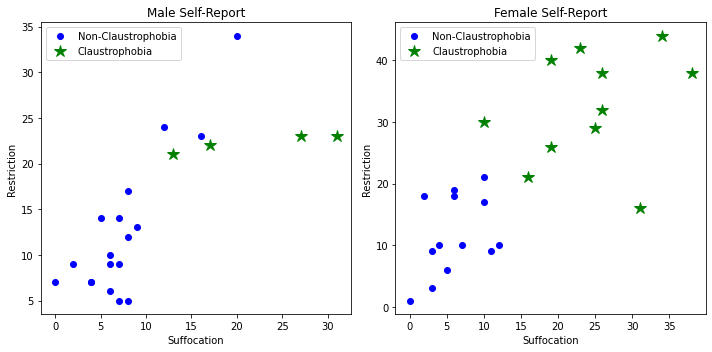

In [ ]:
# Set up the loop and plot
fig1, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))

#-----------------------------------------------------------------------------------------------------
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

ax1.plot(NP_Male_data[0,:], NP_Male_data[1,:], '.', color=colors[0],linewidth=2, markersize=12)
ax1.plot(P_Male_data[0,:], P_Male_data[1,:], '*', color=colors[2],linewidth=2, markersize=12)
ax1.legend(["Non-Claustrophobia", "Claustrophobia"])
ax1.set_title("Male Self-Report")
ax1.set_xlabel("Suffocation")
ax1.set_ylabel("Restriction")

ax2.plot(NP_Female_data[0,:], NP_Female_data[1,:], '.', color=colors[0],linewidth=2, markersize=12)
ax2.plot(P_Female_data[0,:], P_Female_data[1,:], '*', color=colors[2],linewidth=2, markersize=12)
ax2.legend(["Non-Claustrophobia", "Claustrophobia"])
ax2.set_title("Female Self-Report")
ax2.set_xlabel("Suffocation")
ax2.set_ylabel("Restriction")


fig1.tight_layout()

In [ ]:
xpts = NP_Female_data[0,:]
ypts = NP_Female_data[1,:]
alldata_NPFemale = np.vstack((xpts, ypts))

xpts = P_Female_data[0,:]
ypts = P_Female_data[1,:]
alldata_PFemale = np.vstack((xpts, ypts))

xpts = P_Male_data[0,:]
ypts = P_Male_data[1,:]
alldata_Pmale = np.vstack((xpts, ypts))

xpts = NP_Male_data[0,:]
ypts = NP_Male_data[1,:]
alldata_NPmale = np.vstack((xpts, ypts))

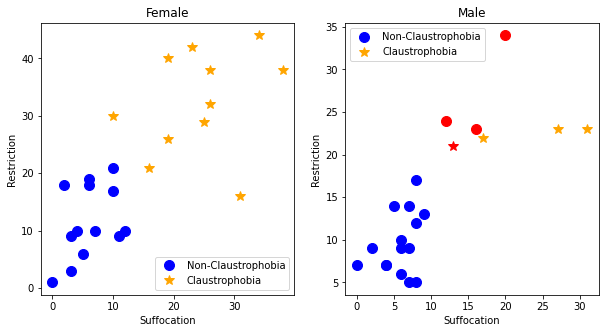

In [ ]:
newdata_N = alldata_NPFemale
newdata_P = alldata_PFemale

# Predict new cluster membership with `cmeans_predict` as well as
# `cntr` from the 3-cluster model
uN, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
    newdata_N, cntr, 2, error=0.005, maxiter=1000)

uP, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
    newdata_P, cntr, 2, error=0.005, maxiter=1000)

# Plot the classified uniform data. Note for visualization the maximum
# membership value has been taken at each point (i.e. these are hardened,
# not fuzzy results visualized) but the full fuzzy result is the output
# from cmeans_predict.
cluster_membership_N = np.argmax(uN, axis=0)  # Hardening for visualization
cluster_membership_P = np.argmax(uP, axis=0)  # Hardening for visualization

fig2, [ax3, ax4] = plt.subplots(1, 2, figsize=(10, 5))
ax3.set_title('Female')
for j in range(2):
    ax3.plot(newdata_N[0, cluster_membership_N == j],
             newdata_N[1, cluster_membership_N == j], 'o', color=colors[0],linewidth=2, markersize=10) 
    ax3.plot(newdata_P[0, cluster_membership_P == j],
             newdata_P[1, cluster_membership_P == j], '*', color=colors[1],linewidth=2, markersize=10) 
    
ax3.legend(['Non-Claustrophobia','Claustrophobia'])
ax3.set_xlabel("Suffocation")
ax3.set_ylabel("Restriction")

#-------------------------------------------------------------------------------
newdata_N = alldata_NPmale
newdata_P = alldata_Pmale

# Predict new cluster membership with `cmeans_predict` as well as
# `cntr` from the 3-cluster model
uN, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
    newdata_N, cntr, 2, error=0.005, maxiter=1000)

uP, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
    newdata_P, cntr, 2, error=0.005, maxiter=1000)

# Plot the classified uniform data. Note for visualization the maximum
# membership value has been taken at each point (i.e. these are hardened,
# not fuzzy results visualized) but the full fuzzy result is the output
# from cmeans_predict.
cluster_membership_N = np.argmax(uN, axis=0)  # Hardening for visualization
cluster_membership_P = np.argmax(uP, axis=0)  # Hardening for visualization


ax4.set_title('Male')

ax4.plot(newdata_N[0, cluster_membership_N == 0],
         newdata_N[1, cluster_membership_N == 0], 'o',color=colors[0],linewidth=2, markersize=10) 

ax4.plot(newdata_P[0, cluster_membership_P == 1],
         newdata_P[1, cluster_membership_P == 1], '*',color=colors[1],linewidth=2, markersize=10) 

ax4.plot(newdata_N[0, cluster_membership_N == 1],
         newdata_N[1, cluster_membership_N == 1], 'o',color=colors[3],linewidth=2, markersize=10) 

ax4.plot(newdata_P[0, cluster_membership_P == 0],
         newdata_P[1, cluster_membership_P == 0], '*',color=colors[3], linewidth=2, markersize=10) 
    
ax4.legend(['Non-Claustrophobia','Claustrophobia'])
ax4.set_xlabel("Suffocation")
ax4.set_ylabel("Restriction")

fig1.tight_layout()

**Hard Clustering**

* Affinity Propagation
* Agglomerative Clustering
* BIRCH
* DBSCAN
* K-Means
* Mini-Batch K-Means
* Mean Shift
* OPTICS
* Spectral Clustering
* Mixture of Gaussians

Reference: [link 1](https://machinelearningmastery.com/clustering-algorithms-with-python/#:~:text=Clustering%20is%20an%20unsupervised%20problem,scikit%2Dlearn%20machine%20learning%20library.)  and  [link 2](https://scikit-learn.org/stable/modules/clustering.html)

In [ ]:
female_data = df_Female[['Suffocation', 'Restriction']].to_numpy()
male_data = df_Male[['Suffocation', 'Restriction']].to_numpy()

**Affinity Propagation**

Affinity Propagation involves finding a set of exemplars that best summarize the data.

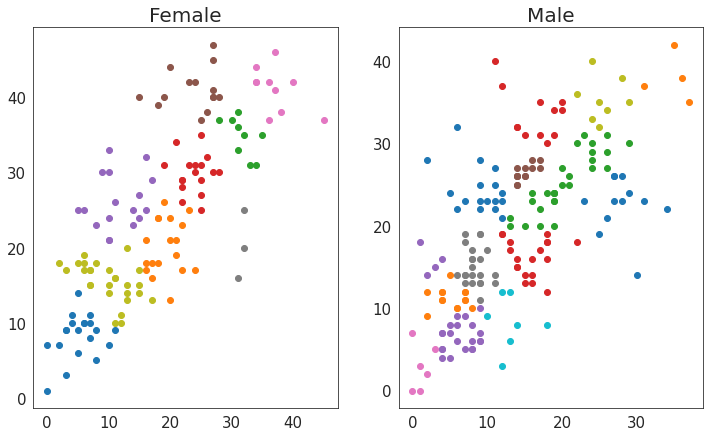

In [ ]:
# affinity propagation clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)

# define the model
model = AffinityPropagation(damping=0.9)

# fit the model for Female
model.fit(female_data)
# assign a cluster to each example
yhat = model.predict(female_data)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	ax1.scatter(female_data[row_ix, 0], female_data[row_ix, 1])
# show the plot


# fit the model for male
model.fit(male_data)
# assign a cluster to each example
yhat = model.predict(male_data)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	ax2.scatter(male_data[row_ix, 0], male_data[row_ix, 1])
# show the plot
ax1.set_title('Female')
ax2.set_title('Male')
plt.show()


**Agglomerative Clustering***

Agglomerative clustering involves merging examples until the desired number of clusters is achieved.

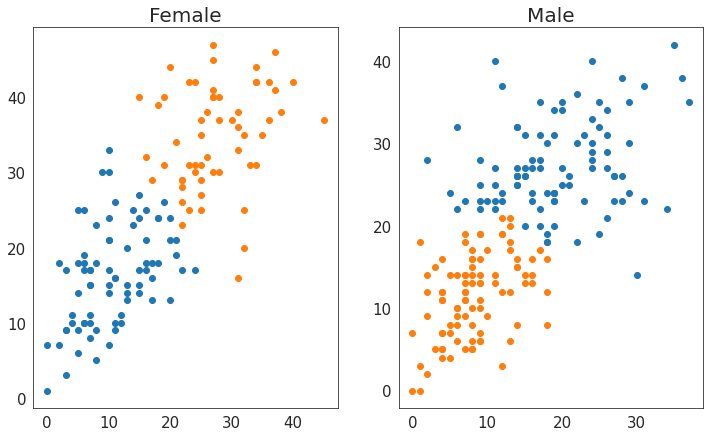

In [ ]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)

# define the model
model = AgglomerativeClustering(n_clusters=2)

# fit the model for Female
model.fit(female_data)
# assign a cluster to each example
yhat = model.fit_predict(female_data)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	ax1.scatter(female_data[row_ix, 0], female_data[row_ix, 1])
# show the plot


# fit the model for male
model.fit(male_data)
# assign a cluster to each example
yhat = model.fit_predict(male_data)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	ax2.scatter(male_data[row_ix, 0], male_data[row_ix, 1])
# show the plot
ax1.set_title('Female')
ax2.set_title('Male')
plt.show()


**BIRCH***

BIRCH Clustering (BIRCH is short for Balanced Iterative Reducing and Clustering using Hierarchies) involves constructing a tree structure from which cluster centroids are extracted.

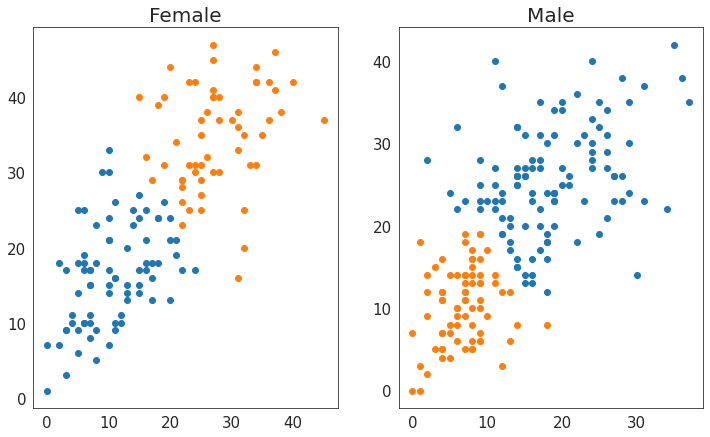

In [ ]:
# birch clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)


# define the model
model = Birch(threshold=0.01, n_clusters=2)

# fit the model for Female
model.fit(female_data)
# assign a cluster to each example
yhat = model.predict(female_data)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	ax1.scatter(female_data[row_ix, 0], female_data[row_ix, 1])
# show the plot


# fit the model for male
model.fit(male_data)
# assign a cluster to each example
yhat = model.predict(male_data)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	ax2.scatter(male_data[row_ix, 0], male_data[row_ix, 1])
# show the plot
ax1.set_title('Female')
ax2.set_title('Male')
plt.show()

**DBSCAN**

DBSCAN Clustering (where DBSCAN is short for Density-Based Spatial Clustering of Applications with Noise) involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.

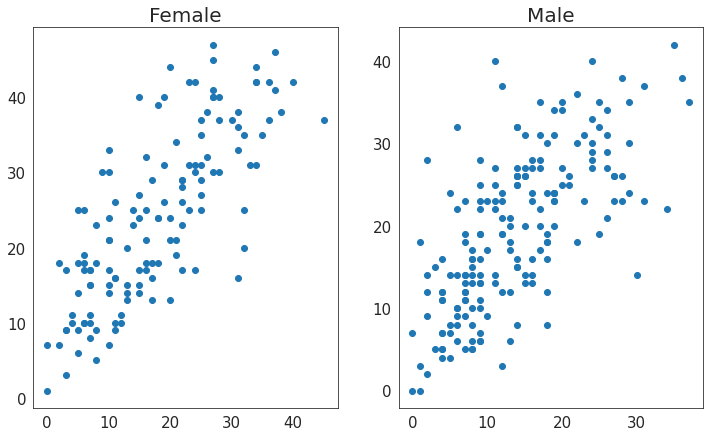

In [ ]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)

# define the model
model = DBSCAN(eps=0.30, min_samples=9)

# fit the model for Female
model.fit(female_data)
# assign a cluster to each example
yhat = model.fit_predict(female_data)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	ax1.scatter(female_data[row_ix, 0], female_data[row_ix, 1])
# show the plot


# fit the model for male
model.fit(male_data)
# assign a cluster to each example
yhat = model.fit_predict(male_data)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	ax2.scatter(male_data[row_ix, 0], male_data[row_ix, 1])
# show the plot
ax1.set_title('Female')
ax2.set_title('Male')
plt.show()

**K-Means***

K-Means Clustering may be the most widely known clustering algorithm and involves assigning examples to clusters in an effort to minimize the variance within each cluster.

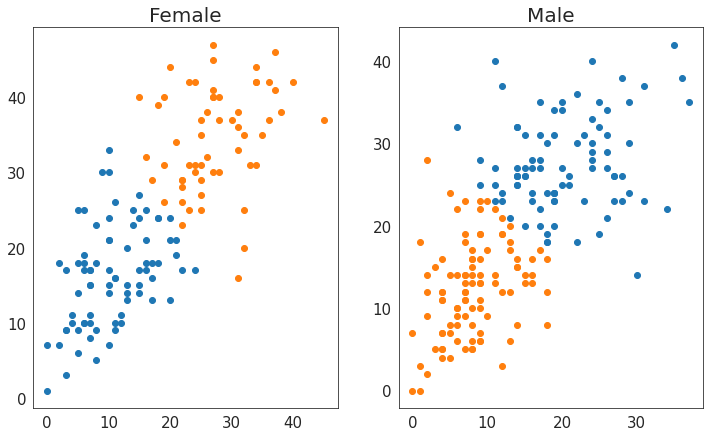

In [ ]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)

# define the model
model = KMeans(n_clusters=2)


# fit the model for Female
model.fit(female_data)
# assign a cluster to each example
yhat = model.predict(female_data)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	ax1.scatter(female_data[row_ix, 0], female_data[row_ix, 1])
# show the plot


# fit the model for male
model.fit(male_data)
# assign a cluster to each example
yhat = model.predict(male_data)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	ax2.scatter(male_data[row_ix, 0], male_data[row_ix, 1])
# show the plot
ax1.set_title('Female')
ax2.set_title('Male')
plt.show()

**Mini-Batch K-Means***


Mini-Batch K-Means is a modified version of k-means that makes updates to the cluster centroids using mini-batches of samples rather than the entire dataset, which can make it faster for large datasets, and perhaps more robust to statistical noise.

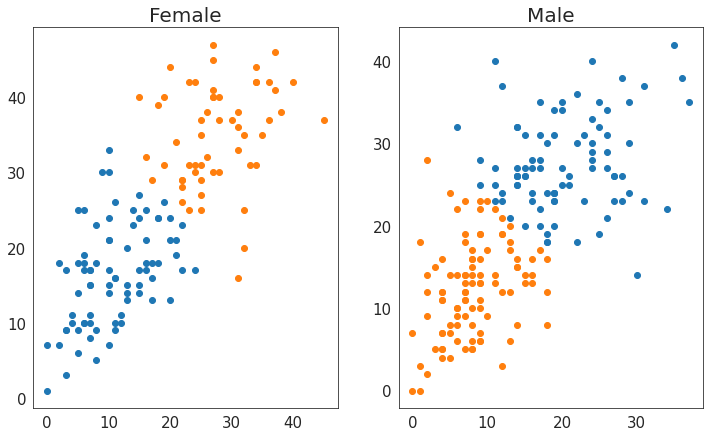

In [ ]:
# mini-batch k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)

# define the model
model = MiniBatchKMeans(n_clusters=2)
# fit the model for Female
model.fit(female_data)
# assign a cluster to each example
yhat = model.predict(female_data)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	ax1.scatter(female_data[row_ix, 0], female_data[row_ix, 1])
# show the plot

# fit the model for male
model.fit(male_data)
# assign a cluster to each example
yhat = model.predict(male_data)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	ax2.scatter(male_data[row_ix, 0], male_data[row_ix, 1])
# show the plot
ax1.set_title('Female')
ax2.set_title('Male')
plt.show()

**Mean Shift**

Mean shift clustering involves finding and adapting centroids based on the density of examples in the feature space.

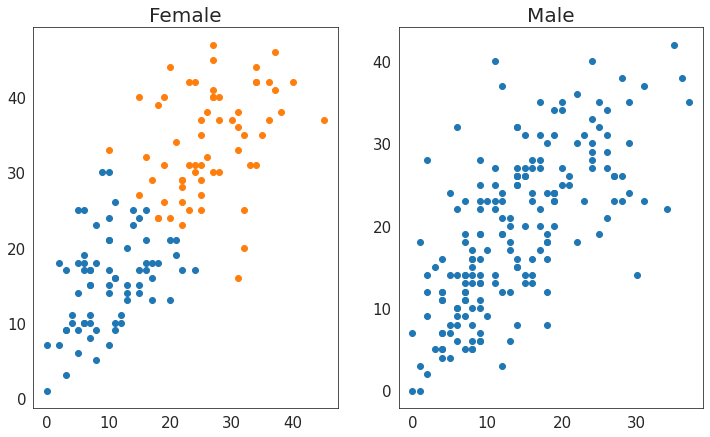

In [ ]:
# mean shift clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)

# define the model
model = MeanShift()

# fit the model for Female
model.fit(female_data)
# assign a cluster to each example
yhat = model.fit_predict(female_data)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	ax1.scatter(female_data[row_ix, 0], female_data[row_ix, 1])
# show the plot


# fit the model for male
model.fit(male_data)
# assign a cluster to each example
yhat = model.fit_predict(male_data)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	ax2.scatter(male_data[row_ix, 0], male_data[row_ix, 1])
# show the plot
ax1.set_title('Female')
ax2.set_title('Male')
plt.show()

**OPTICS**

OPTICS clustering (where OPTICS is short for Ordering Points To Identify the Clustering Structure) is a modified version of DBSCAN described above.

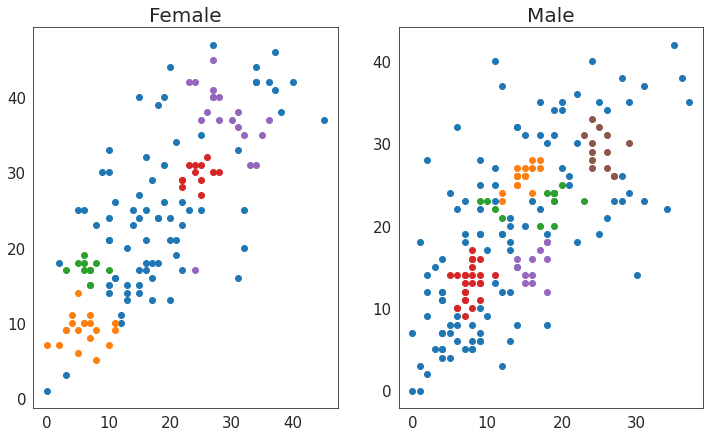

In [ ]:
# optics clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)

# define the model
model = OPTICS(eps=0.8, min_samples=10)

# fit the model for Female
model.fit(female_data)
# assign a cluster to each example
yhat = model.fit_predict(female_data)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	ax1.scatter(female_data[row_ix, 0], female_data[row_ix, 1])
# show the plot


# fit the model for male
model.fit(male_data)
# assign a cluster to each example
yhat = model.fit_predict(male_data)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	ax2.scatter(male_data[row_ix, 0], male_data[row_ix, 1])
# show the plot
ax1.set_title('Female')
ax2.set_title('Male')
plt.show()

**Spectral Clustering**

Spectral Clustering is a general class of clustering methods, drawn from linear algebra.

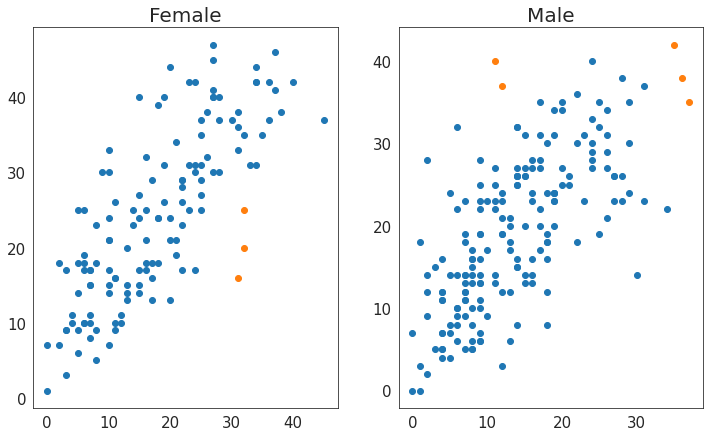

In [ ]:
# spectral clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)

# define the model
model = SpectralClustering(n_clusters=2)

# fit the model for Female
model.fit(female_data)
# assign a cluster to each example
yhat = model.fit_predict(female_data)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	ax1.scatter(female_data[row_ix, 0], female_data[row_ix, 1])
# show the plot


# fit the model for male
model.fit(male_data)
# assign a cluster to each example
yhat = model.fit_predict(male_data)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	ax2.scatter(male_data[row_ix, 0], male_data[row_ix, 1])
# show the plot
ax1.set_title('Female')
ax2.set_title('Male')
plt.show()

**Gaussian Mixture Model***

A Gaussian mixture model summarizes a multivariate probability density function with a mixture of Gaussian probability distributions as its name suggests.

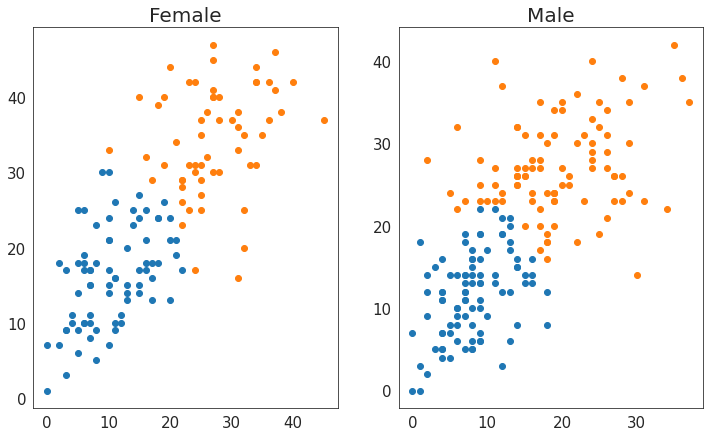

In [ ]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)

# define the model
model = GaussianMixture(n_components=2)


# fit the model for Female
model.fit(female_data)
# assign a cluster to each example
yhat = model.predict(female_data)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	ax1.scatter(female_data[row_ix, 0], female_data[row_ix, 1])
# show the plot


# fit the model for male
model.fit(male_data)
# assign a cluster to each example
yhat = model.predict(male_data)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	ax2.scatter(male_data[row_ix, 0], male_data[row_ix, 1])
# show the plot
ax1.set_title('Female')
ax2.set_title('Male')
plt.show()

#**Determining The Optimal Number Of Clusters**

These methods include direct methods and statistical testing methods:

1. Direct methods: consists of optimizing a criterion, such as the within cluster sums of squares or the average silhouette. The corresponding methods are named elbow and silhouette methods, respectively.

2. Statistical testing methods: consists of comparing evidence against null hypothesis. An example is the gap statistic.

Reference: [link 1](https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/) and [link 2](https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad)

In [ ]:
!pip install yellowbrick

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f3155d3c198>,
                 k=None, metric=None, model=None, timings=True)

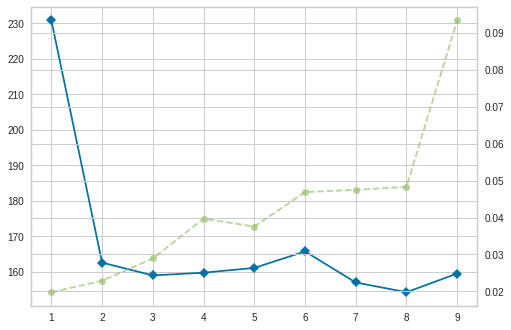

In [ ]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,10), timings= True)
visualizer.fit(female_data)        # Fit data to visualizer


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f31568d9160>,
                 k=None, metric=None, model=None, timings=True)

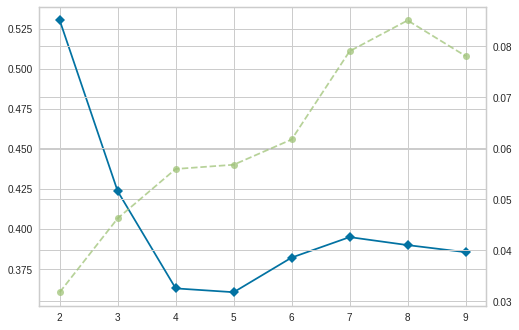

In [ ]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(female_data)        # Fit the data to the visualizer


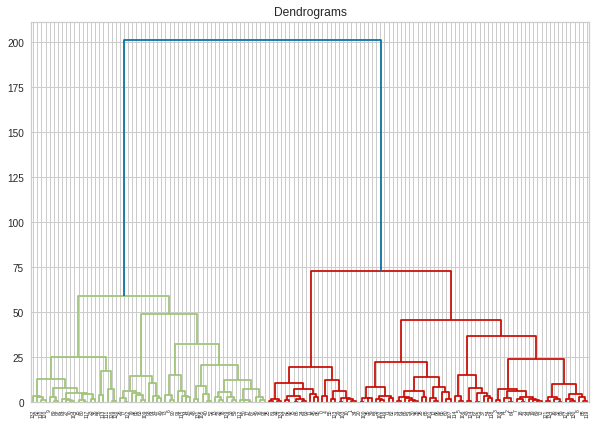

In [ ]:
# Dendogram for Heirarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(female_data, method='ward'))


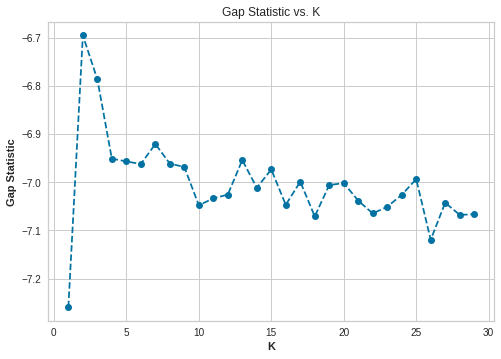

In [ ]:
# Gap Statistic for K means
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)

score_g, df = optimalK(female_data, nrefs=5, maxClusters=30)
plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

#**Cluster Validation Statistics**

The term cluster validation is used to design the procedure of evaluating the goodness of clustering algorithm results. This is important to avoid finding patterns in a random data, as well as, in the situation where you want to compare two clustering algorithms.

Generally, clustering validation statistics can be categorized into 3 classes (Charrad et al. 2014,Brock et al. (2008), Theodoridis and Koutroumbas (2008)):

1. Internal cluster validation, which uses the internal information of the clustering process to evaluate the goodness of a clustering structure without reference to external information. It can be also used for estimating the number of clusters and the appropriate clustering algorithm without any external data.
2. External cluster validation, which consists in comparing the results of a cluster analysis to an externally known result, such as externally provided class labels. It measures the extent to which cluster labels match externally supplied class labels. Since we know the “true” cluster number in advance, this approach is mainly used for selecting the right clustering algorithm for a specific data set.
3. Relative cluster validation, which evaluates the clustering structure by varying different parameter values for the same algorithm (e.g.,: varying the number of clusters k). It’s generally used for determining the optimal number of clusters.

Reference: [link](https://www.datanovia.com/en/lessons/cluster-validation-statistics-must-know-methods/)

#**Choosing the Best Clustering Algorithms**

* Measures for comparing clustering algorithms


1. Internal measures, which uses intrinsic information in the data to assess the quality of the clustering. Internal measures include the connectivity, the silhouette coefficient and the Dunn index as described in the Chapter cluster validation statistics.
2. Stability measures, a special version of internal measures, which evaluates the consistency of a clustering result by comparing it with the clusters obtained after each column is removed, one at a time.
Cluster stability measures include:

* The average proportion of non-overlap (APN)
* The average distance (AD)
* The average distance between means (ADM)
* The figure of merit (FOM)
* The APN, AD, and ADM are all based on the cross-classification table of the original clustering on the full data with the clustering based on the removal of one column.

The APN measures the average proportion of observations not placed in the same cluster by clustering based on the full data and clustering based on the data with a single column removed.

The AD measures the average distance between observations placed in the same cluster under both cases (full data set and removal of one column).

The ADM measures the average distance between cluster centers for observations placed in the same cluster under both cases.

The FOM measures the average intra-cluster variance of the deleted column, where the clustering is based on the remaining (undeleted) columns.